# House Prices Prediction Project

## Problem Statement
The goal of this project is to predict house prices using machine learning models.
We explore the dataset, preprocess the features, train Linear Regression and Random Forest models,
and evaluate their performance. Finally, we analyze feature importance and improve predictions.

## Dataset
The dataset contains various features of houses (e.g., size, quality, number of rooms)
and the target variable `SalePrice`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Step 1: Data Loading and Exploration

I started by loading the dataset and exploring the main characteristics:
- Shape of the dataset (rows and columns)
- Checking for missing values
- Visualizing the distribution of the target variable `SalePrice`
- Exploring correlations between numeric features and `SalePrice`


In [29]:
!pip install -q kaggle
from google.colab import files #Upload Kaggle API key (kaggle.json)
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [30]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c house-prices-advanced-regression-techniques -f train.csv

train.csv: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print("Shape", df.shape)
print("Columns:", df.columns.tolist())

df.info()
df.describe()

Shape (1460, 81)
Columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPo

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


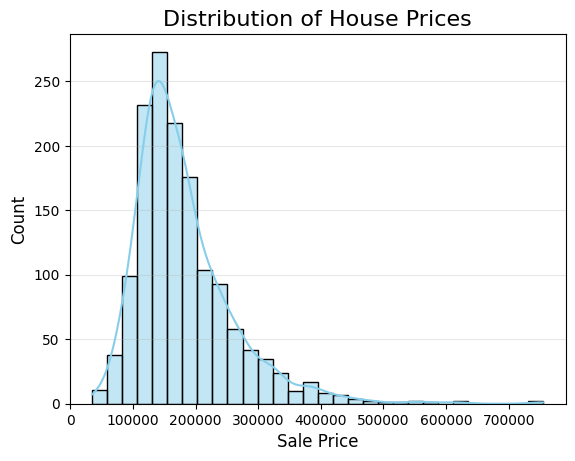

In [ ]:
#SalePrice distribution

sns.histplot(df["SalePrice"], bins= 30, kde = True, color= 'skyblue')
plt.title("Distribution of House Prices", fontsize= 16)
plt.xlabel("Sale Price", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.grid(axis= 'y', alpha= 0.3)
plt.show()

The distribution of SalePrice appears approximately normal

In [ ]:
#Correlation of numeric features with SalePrice

corr = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
print(corr.head(10)) #top 10 positive correlations
print(corr.tail(10)) #top 10 negative correlations


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


`OverallQual` has the highest positive correlation with SalePrice, indicating
that house quality is a strong predictor of price.


## Step 2: Preprocessing the Data

I selected features and the target variable:
- Initial features: OverallQual, GrLivArea, GarageCars, TotalBsmtSF
- Target variable: SalePrice

Missing values in selected features are filled with the median value.

The dataset is split into training (80%) and test (20%) sets for model evaluation.

In [ ]:
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF"]
X = df[features]
Y = df["SalePrice"]

In [ ]:
print(X.isnull().sum())

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
dtype: int64


In [ ]:
# 80% train, 20% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Step 3: Linear Regression

 A Linear Regression model was trained using the selected features.
- Evaluate the model using RMSE
- Visualize predictions vs actual SalePrice using a scatter plot

This provides a baseline for model performance.

In [ ]:
# create model
model = LinearRegression()

# Train model with data
model.fit(X_train, Y_train)

# Predict with test set
Y_pred = model.predict(X_test)


In [ ]:
#RMSE to test goodness of fit over MSE due to units
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

Root Mean Squared Error: 40036.42


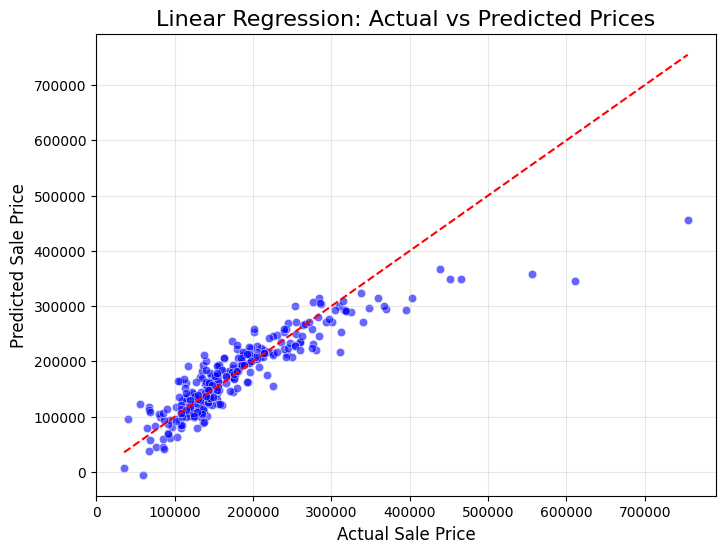

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = Y_test, y = Y_pred, color= 'blue', alpha= 0.6)
plt.xlabel("Actual Sale Price", fontsize= 12)
plt.ylabel("Predicted Sale Price", fontsize=12)
plt.title("Linear Regression: Actual vs Predicted Prices", fontsize=16)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.grid(alpha= 0.3)
plt.show()

The scatter plot compares actual vs predicted prices. Dots near the red line indicate accurate predictions, while outliers are houses where the model performed poorly.

## Step 4: Random Forest Regression

A Random Forest model was trained to improve predictions.
- Random Forest can capture non-linear relationships between features and SalePrice
- It is more robust to outliers compared to Linear Regression

The model was evaluated using RMSE and visualize predictions.

In [ ]:
# Random forest regression in order to handle outliers

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf_model.fit(X_train, Y_train)

Y_pred_rf = rf_model.predict(X_test)

In [ ]:
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Random Forest RMSE: 30020.31


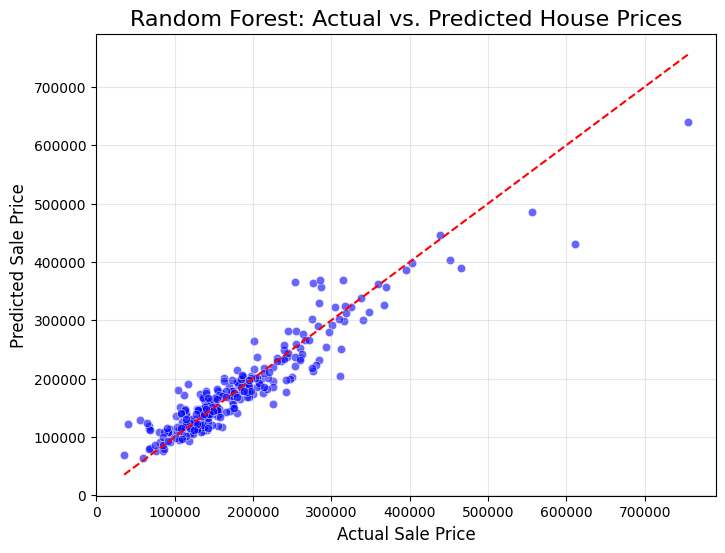

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = Y_test, y = Y_pred_rf, color= 'blue', alpha= 0.6)
plt.xlabel("Actual Sale Price", fontsize= 12)
plt.ylabel("Predicted Sale Price", fontsize= 12)
plt.title("Random Forest: Actual vs. Predicted House Prices", fontsize= 16)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.grid(alpha= 0.3)
plt.show()

Random Forest predictions are closer to the diagonal line compared to Linear Regression,
indicating improved accuracy and reduced error for most houses.

## Step 5: Model Improvements

The feature set was extended by adding additional top correlated features:
- FullBath, TotRmsAbvGrd, YearBuilt, Fireplaces

The Random Forest model was retrained with these extended features to improve accuracy.

In [ ]:
#Adding more features to improve model
features_extended = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "Fireplaces"]
X_extended = df[features_extended].fillna(df[features_extended].median())

#Split data for training
X_train_ext, X_test_ext, Y_train_ext, Y_test_ext = train_test_split(X_extended, Y, test_size=0.2, random_state=42)


In [ ]:
# Retrain Random Forest with the new features
rf_model_ext = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model_ext.fit(X_train_ext, Y_train_ext)

Y_pred_rf_ext = rf_model_ext.predict(X_test_ext)

rmse_rf_ext = np.sqrt(mean_squared_error(Y_test_ext, Y_pred_rf_ext))
print(f"Random Forest RMSE with extended features: {rmse_rf_ext:.2f}")

Random Forest RMSE with extended features: 28371.72


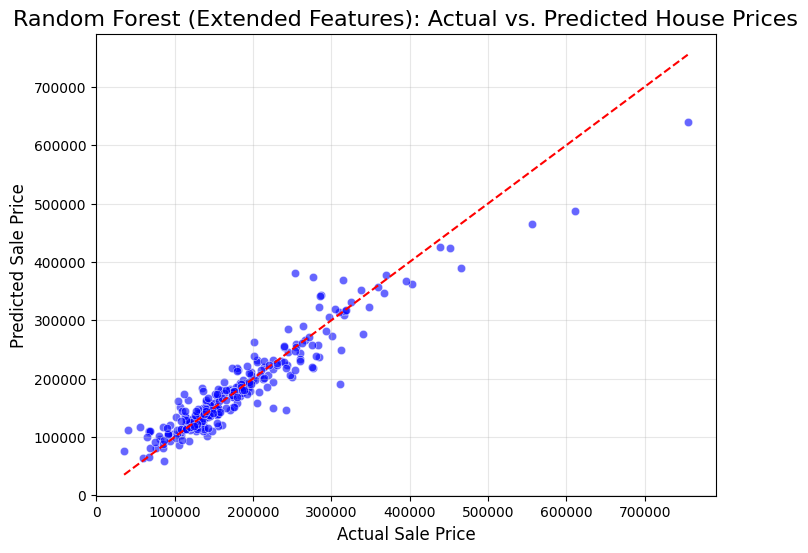

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = Y_test_ext, y = Y_pred_rf_ext, color = 'blue', alpha= 0.6)
plt.xlabel("Actual Sale Price", fontsize= 12)
plt.ylabel("Predicted Sale Price", fontsize= 12)
plt.title("Random Forest (Extended Features): Actual vs. Predicted House Prices", fontsize= 16)
plt.plot([Y_test_ext.min(), Y_test_ext.max()], [Y_test_ext.min(), Y_test_ext.max()], 'r--')
plt.grid(alpha= 0.3)
plt.show()

## Step 6: Feature Importance

Features contributing the most to the Random Forest predictions were examined.
This helps us understand what drives house prices in the dataset.

In [ ]:
# Which features contributed most to predictions

importance = rf_model_ext.feature_importances_
feature_importance = pd.Series(importance, index = features_extended).sort_values(ascending = False)
print(feature_importance)


OverallQual     0.578079
GrLivArea       0.187930
TotalBsmtSF     0.106251
YearBuilt       0.054904
GarageCars      0.028907
TotRmsAbvGrd    0.018096
Fireplaces      0.013340
FullBath        0.012493
dtype: float64


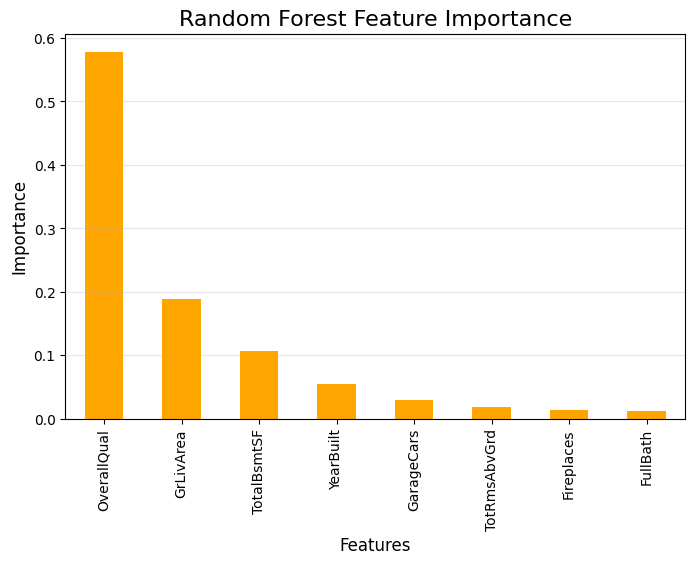

In [ ]:
feature_importance = pd.Series(rf_model_ext.feature_importances_, index=features_extended).sort_values(ascending=False)
plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar', color='orange')
plt.title("Random Forest Feature Importance", fontsize=16)
plt.ylabel("Importance", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

## Step 7: Conclusion

- OverallQual and GrLivArea are the strongest predictors of house price.
- Random Forest with extended features reduced RMSE and improved predictions.
- Visualizations show that the model predicts most houses accurately, with some outliers.

#Results Summary

In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest (4 features)", "Random Forest (8 features)"],
    "Features": ["4 selected features", "4 selected features", "Extended 8 features"],
    "RMSE": [rmse, rmse_rf, rmse_rf_ext]
})

results

,Model,Features,RMSE
0,Linear Regression,4 selected features,40036.418664
1,Random Forest (4 features),4 selected features,30020.310951
2,Random Forest (8 features),Extended 8 features,28371.719864


The table summarizes the RMSE for each model. Lower RMSE indicates better predictive performance.
- Linear Regression serves as a baseline.
- Random Forest improves predictions due to capturing non-linear relationships.
- Adding more features to Random Forest further reduces RMSE.

#Interactive Prediction
 Input features for a house and get estimated SalePrice.

In [ ]:
def predict_house_price(overall_qual, gr_liv_area, garage_cars, total_bsmt_sf,
                        full_bath=None, tot_rms_abv_grd=None, year_built=None, fireplaces=None):

    import pandas as pd

    # Prepare input as a DataFrame
    input_data = pd.DataFrame({
        "OverallQual": [overall_qual],
        "GrLivArea": [gr_liv_area],
        "GarageCars": [garage_cars],
        "TotalBsmtSF": [total_bsmt_sf],
        "FullBath": [full_bath if full_bath is not None else df['FullBath'].median()],
        "TotRmsAbvGrd": [tot_rms_abv_grd if tot_rms_abv_grd is not None else df['TotRmsAbvGrd'].median()],
        "YearBuilt": [year_built if year_built is not None else df['YearBuilt'].median()],
        "Fireplaces": [fireplaces if fireplaces is not None else df['Fireplaces'].median()]
    })

    # Predict using the trained Random Forest model
    predicted_price = rf_model_ext.predict(input_data)[0]
    return predicted_price


In [ ]:
overall_qual = int(input("Overall Quality (1-10): "))
gr_liv_area = float(input("Above-ground living area (sq ft): "))
garage_cars = int(input("Number of garage cars: "))
total_bsmt_sf = float(input("Total basement area (sq ft): "))

# Optional features with default median
full_bath = input("Number of full bathrooms (press Enter to use median): ")
full_bath = int(full_bath) if full_bath else None

tot_rms_abv_grd = input("Total rooms above ground (press Enter to use median): ")
tot_rms_abv_grd = int(tot_rms_abv_grd) if tot_rms_abv_grd else None

year_built = input("Year built (press Enter to use median): ")
year_built = int(year_built) if year_built else None

fireplaces = input("Number of fireplaces (press Enter to use median): ")
fireplaces = int(fireplaces) if fireplaces else None

# Predict
estimated_price = predict_house_price(
    overall_qual, gr_liv_area, garage_cars, total_bsmt_sf,
    full_bath, tot_rms_abv_grd, year_built, fireplaces
)

print(f"\nEstimated SalePrice: ${estimated_price:,.2f}")


Overall Quality (1-10): 4
Above-ground living area (sq ft): 1900000
Number of garage cars: 3
Total basement area (sq ft): 1800
Number of full bathrooms (press Enter to use median): 3
Total rooms above ground (press Enter to use median): 0
Year built (press Enter to use median): 2020
Number of fireplaces (press Enter to use median): 0

Estimated SalePrice: $193,668.59
